In [1]:
from IPython.display import Image

# Part 1

Data saved as pickle files: `bjp_tweets.pkl` and `congress_tweets.pkl` . All images are being dynamically screenshotted using an api (all keys removed for privacy).
Image files have relevant names and saved in the folder

In [2]:
import tweepy

# Consumer keys and access tokens, used for OAuth
consumer_key = 'VZqEYmmm7uhj35mnVaTWDYr4i'
consumer_secret = 'bv2e0He3Y1UmlmJKxL6nchDfZh8SdgkgYzsRk52dkbFGKovRry'
access_token = '3241382239-CHUQiSZEuQZJ5ogR9haTS05O2WBBNV7VB9N2gRs'
access_token_secret = 'XGT2NfdPd10nEryg4vTJ1HQhoAomUjMi4fAkpAQ2zhkFC'

# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

a=[]
for status in tweepy.Cursor(api.user_timeline, screen_name='@BJP4India', tweet_mode="extended").items():
    a.append(status)

In [4]:
import pickle
with open('bjp_tweets.pkl', 'wb') as f:
    pickle.dump(a, f)
print(a[0].favorite_count)

984


In [5]:
likes=a[0].favorite_count
ID=a[0].id
for i in a:
    if(i.favorite_count>likes):
        likes=i.favorite_count
        ID=i.id
print("likes =",likes,"ID =",ID)

likes = 43519 ID = 1110886268408233984


# 1.a. Most liked tweet

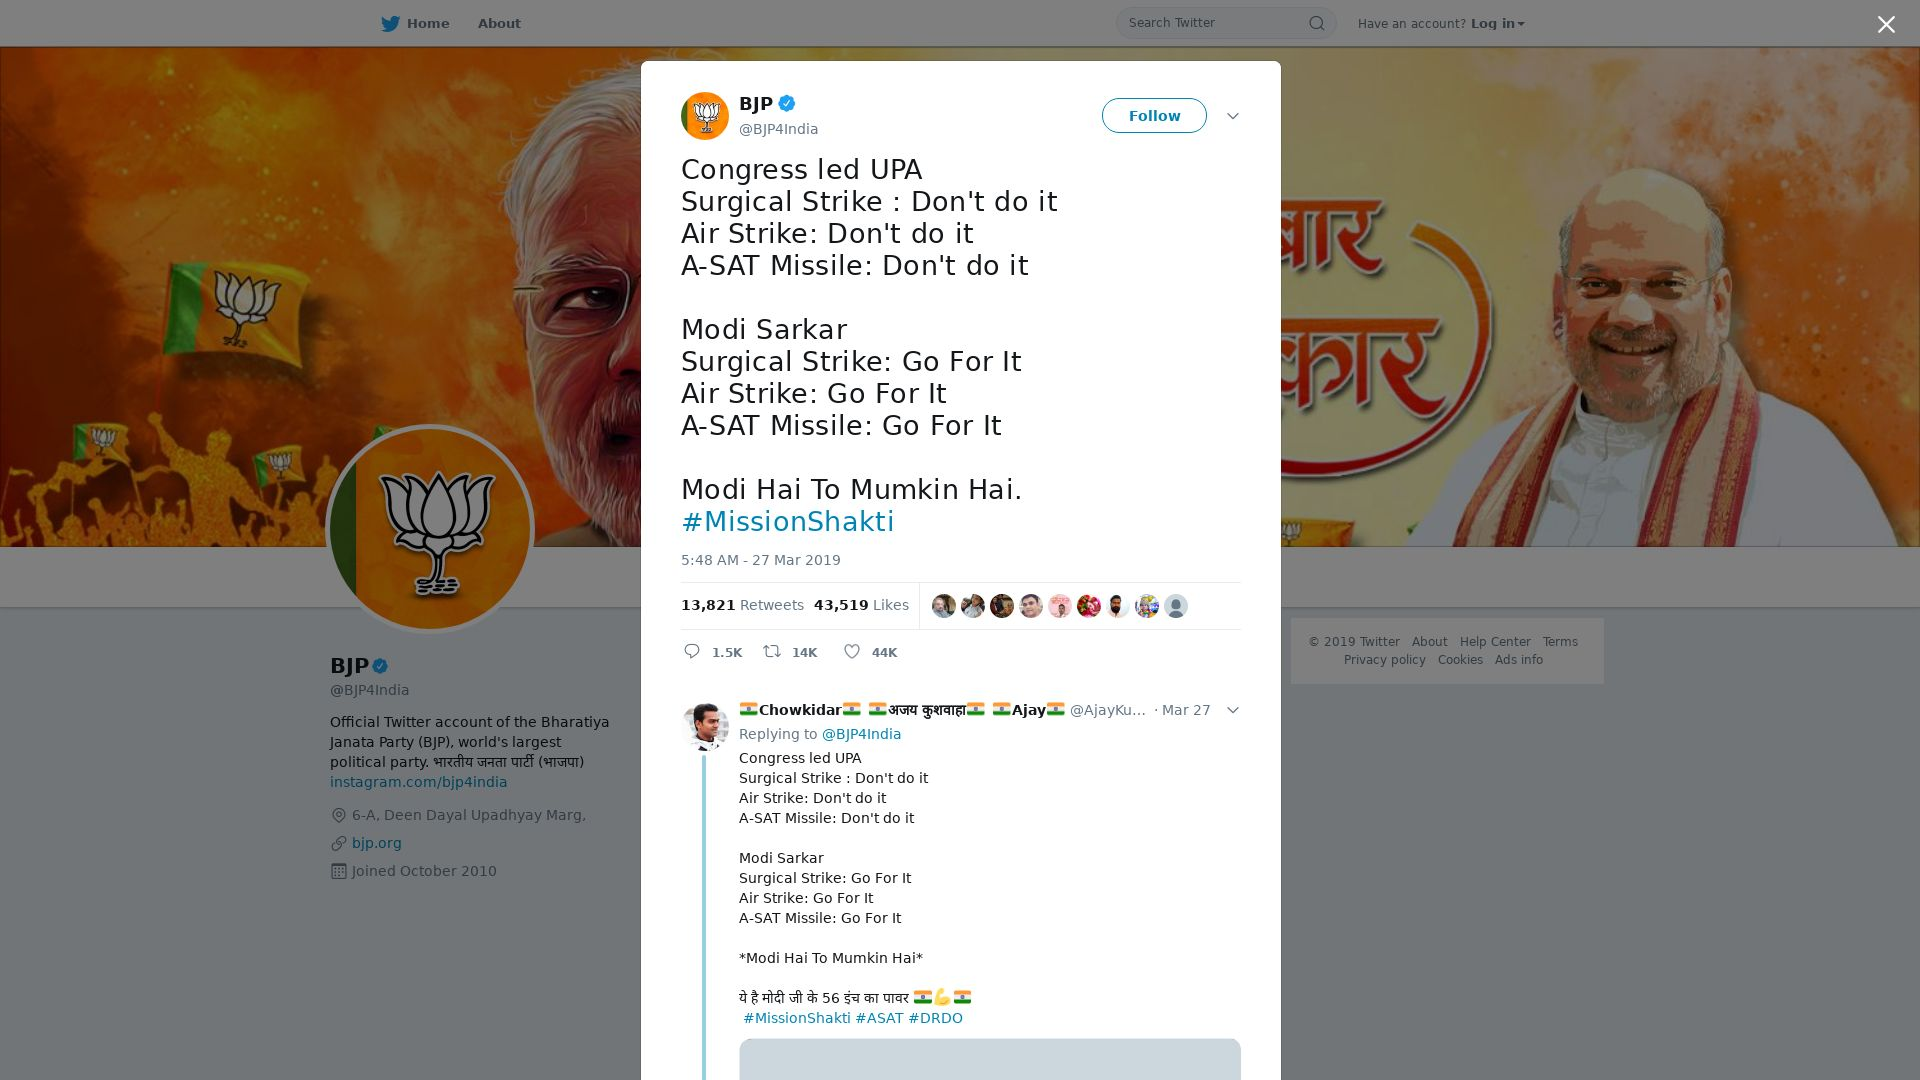

In [6]:
from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image

params = urlencode(dict(access_key="ed9b4d00816249878adf785744b55465",
                        url='https://twitter.com/BJP4India/status/' + str(ID)))
urlretrieve("https://api.apiflash.com/v1/urltoimage?" + params, "most_liked_tweet.jpeg")


Image(filename='most_liked_tweet.jpeg') 

# 1.b. Most retweeted tweet

In [7]:
retweets=a[0].retweet_count
ID=a[0].id
for i in a:
    if(i.retweet_count>retweets):
        retweets=i.retweet_count
        ID=i.id
print("retweets =",retweets,"ID =",ID)

retweets = 56323 ID = 1106767552351559680


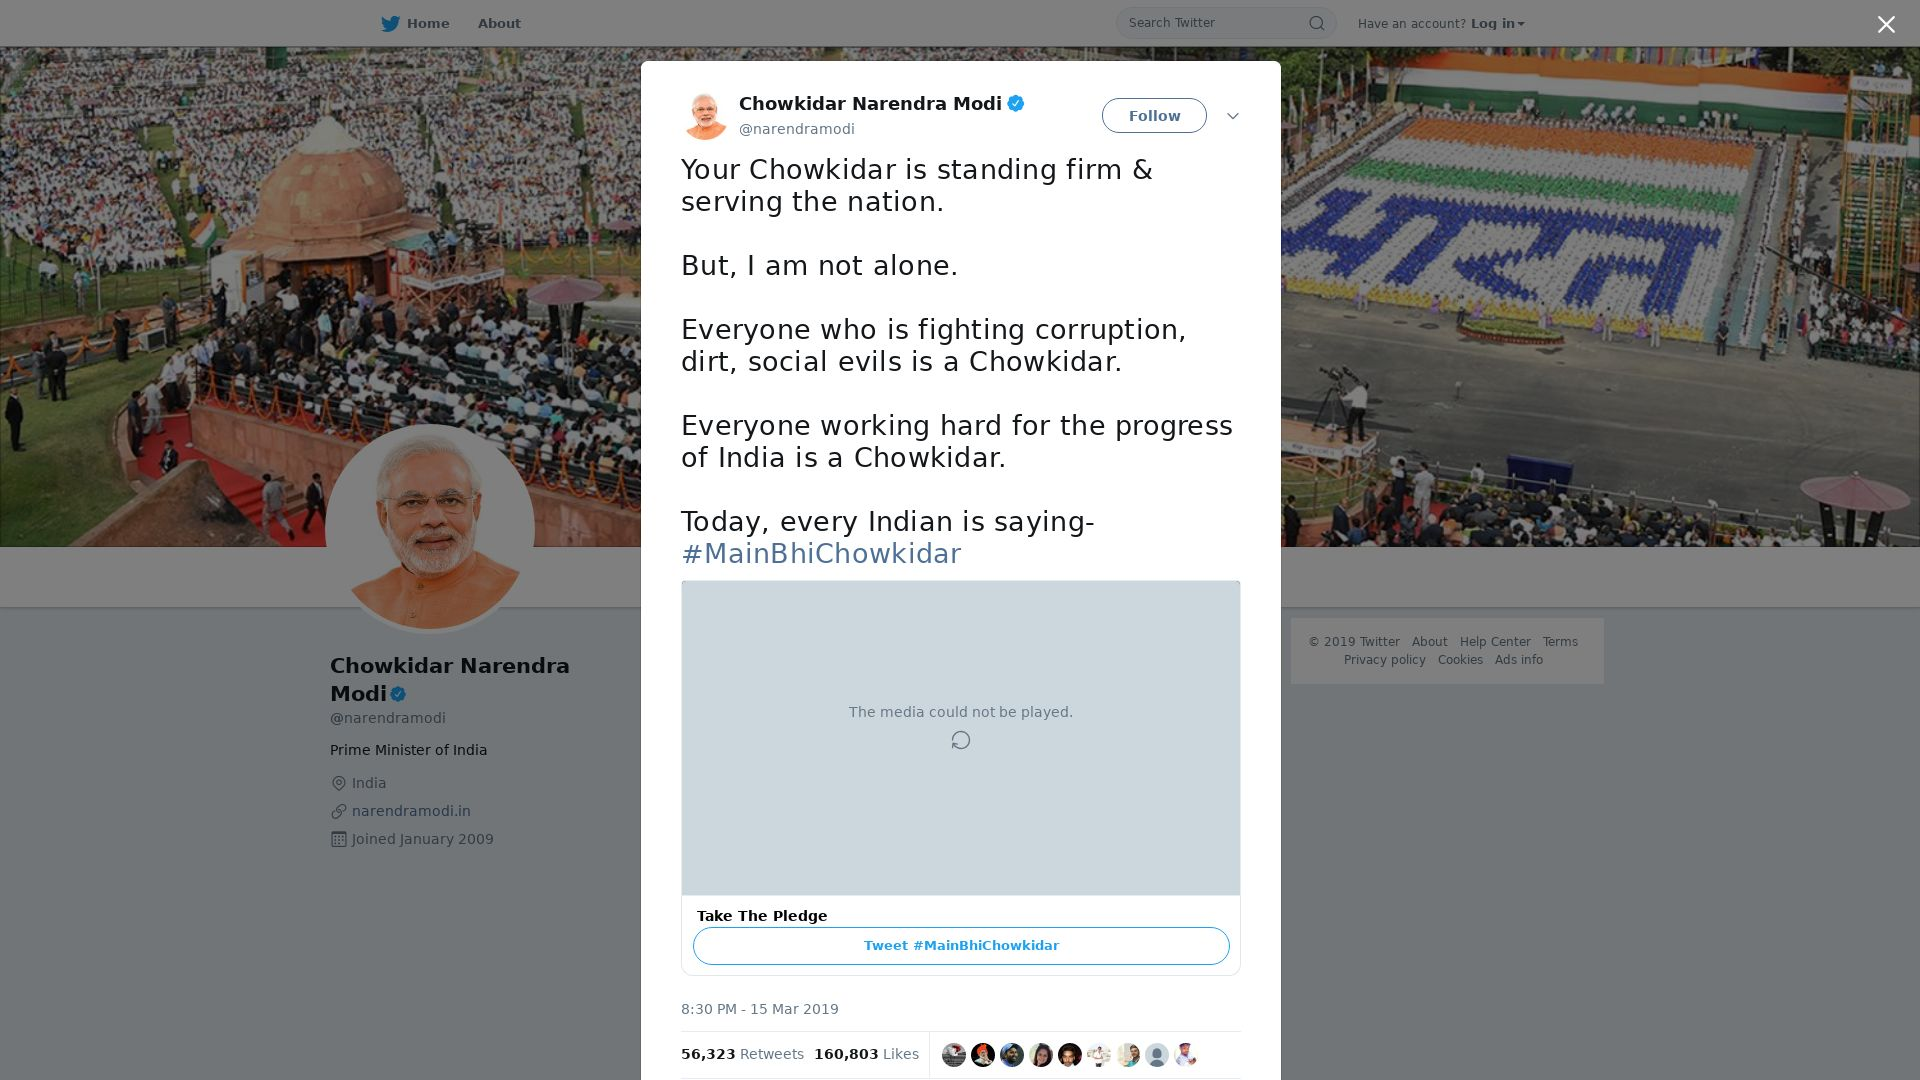

In [8]:
params = urlencode(dict(access_key="ed9b4d00816249878adf785744b55465",
                        url='https://twitter.com/BJP4India/status/' + str(ID)))
urlretrieve("https://api.apiflash.com/v1/urltoimage?" + params, "most_retweeted_tweet.jpeg")


Image(filename='most_retweeted_tweet.jpeg') 

In [9]:
def get_screenshot(ID,name):
    params = urlencode(dict(access_key="ed9b4d00816249878adf785744b55465",
                        url='https://twitter.com/BJP4India/status/' + str(ID)))
    urlretrieve("https://api.apiflash.com/v1/urltoimage?" + params, name)

In [20]:
popular=[]
for i in a:
    popu=i.retweet_count+i.favorite_count
    ID=i.id
    adict={'popularity':popu,'ID':ID}
    popular.append(adict)
# print(popular)
# print("popular =",popular,"ID =",ID)
sorted_popularity=sorted(popular, key = lambda i: i['popularity'],reverse=True)
for i in range(5):
    name="most_popular_tweet"+str(i)+".jpeg"
    get_screenshot(sorted_popularity[i]['ID'],name)


# 1.c. Top 5 most popular tweets 

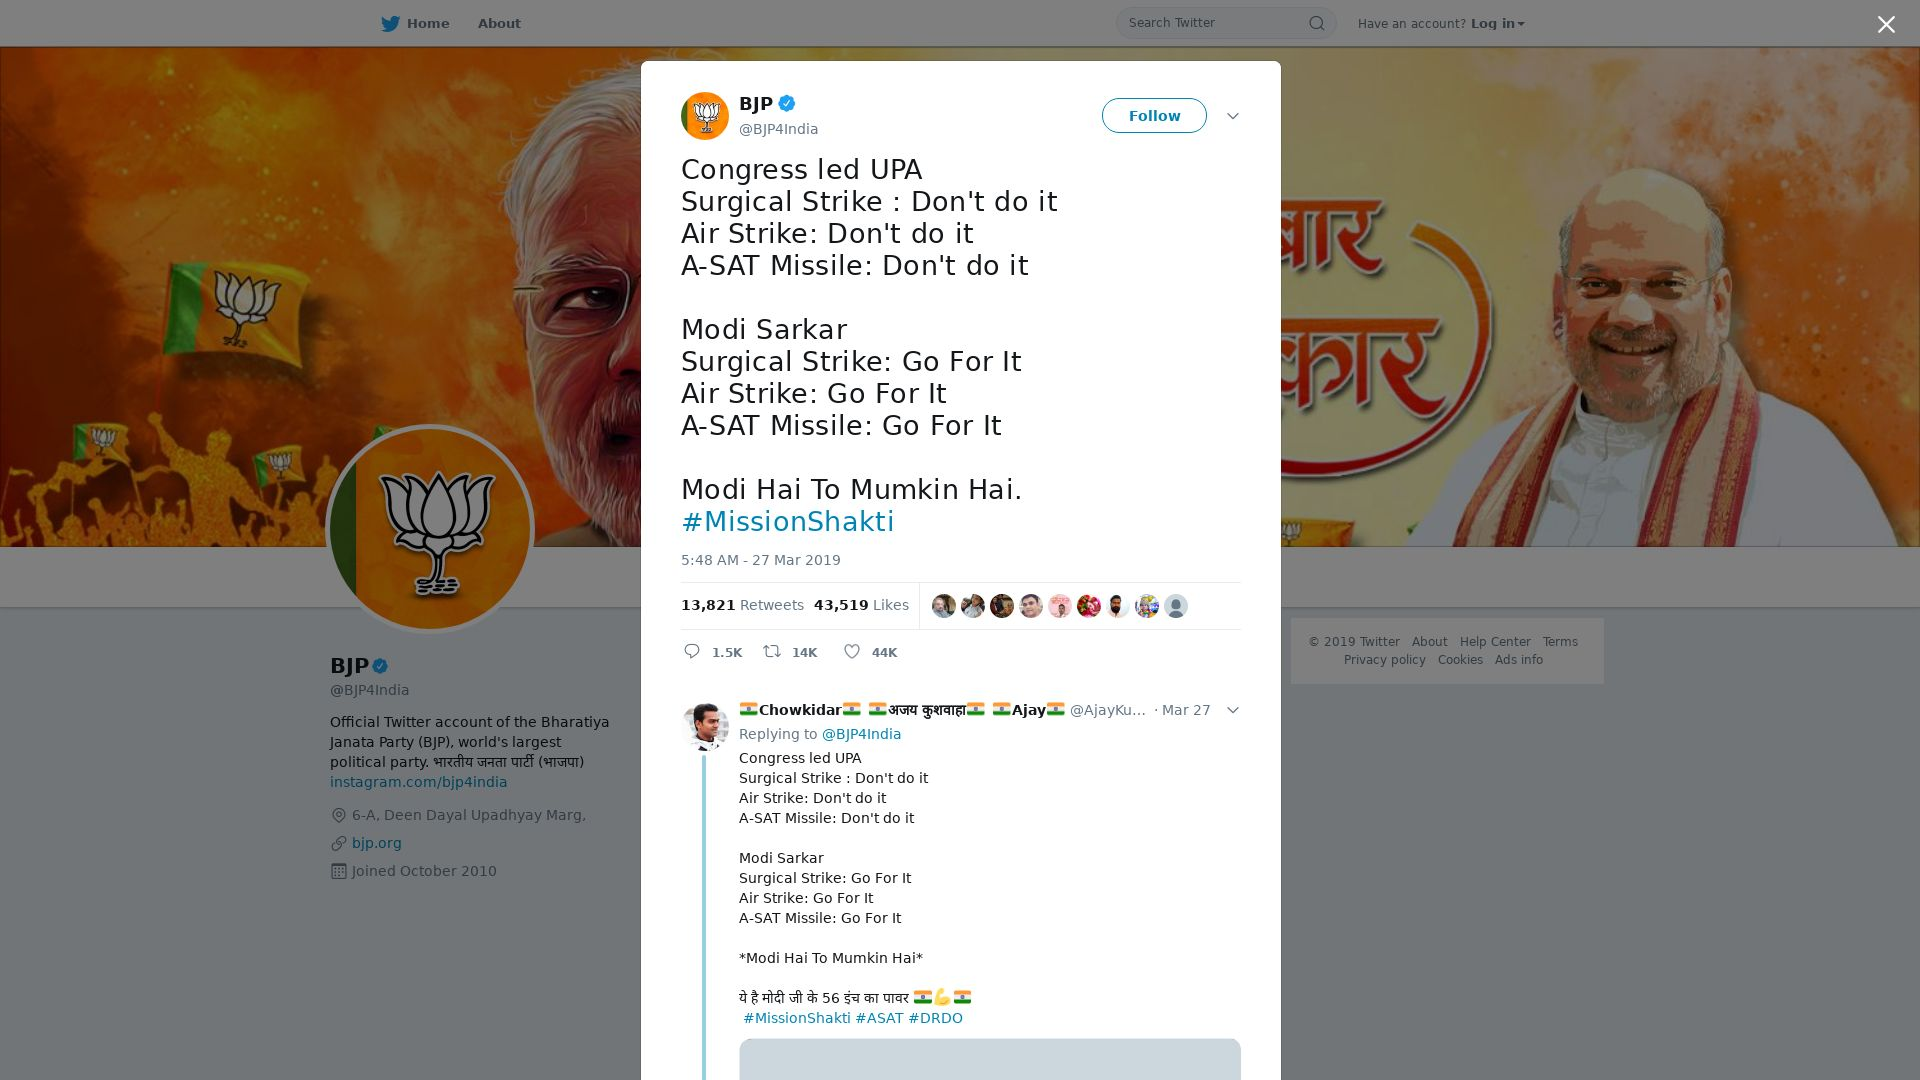

In [21]:
Image(filename='most_popular_tweet0.jpeg') 

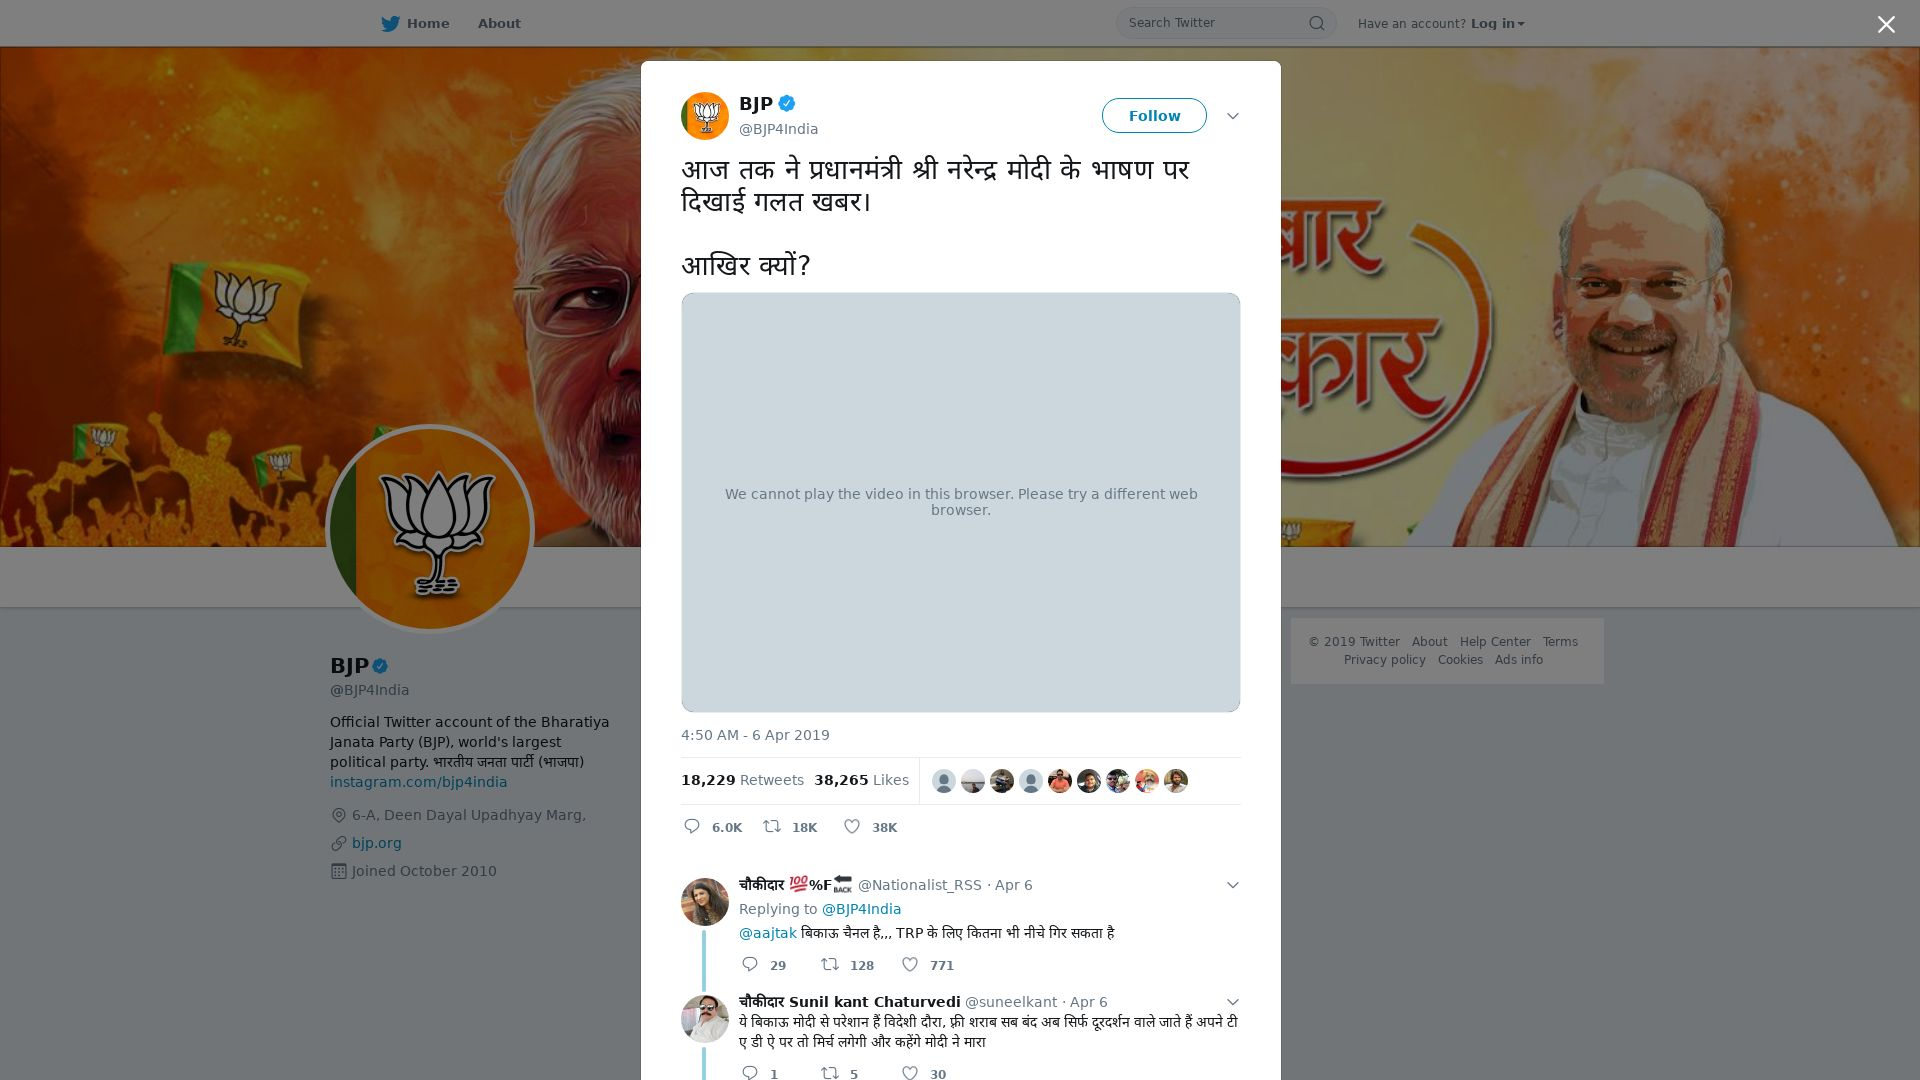

In [22]:
Image(filename='most_popular_tweet1.jpeg') 

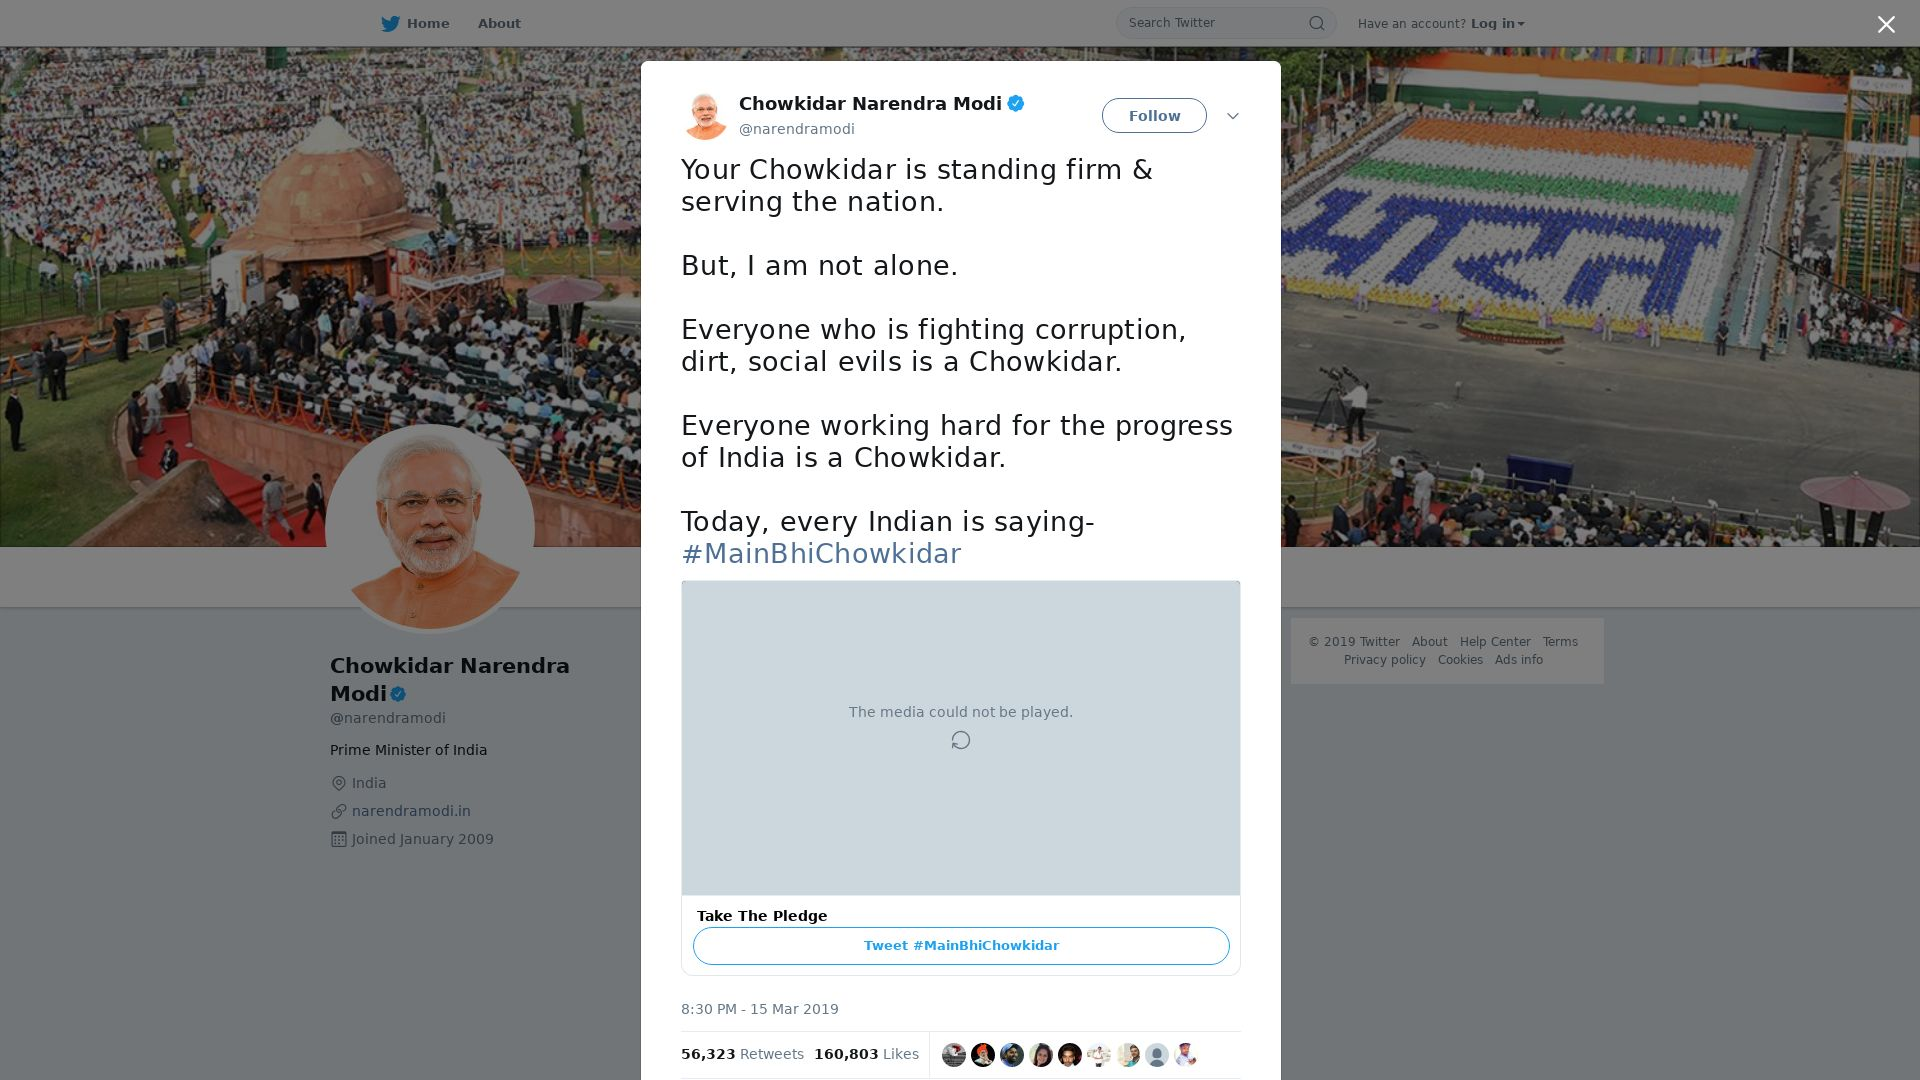

In [23]:
Image(filename='most_popular_tweet2.jpeg') 

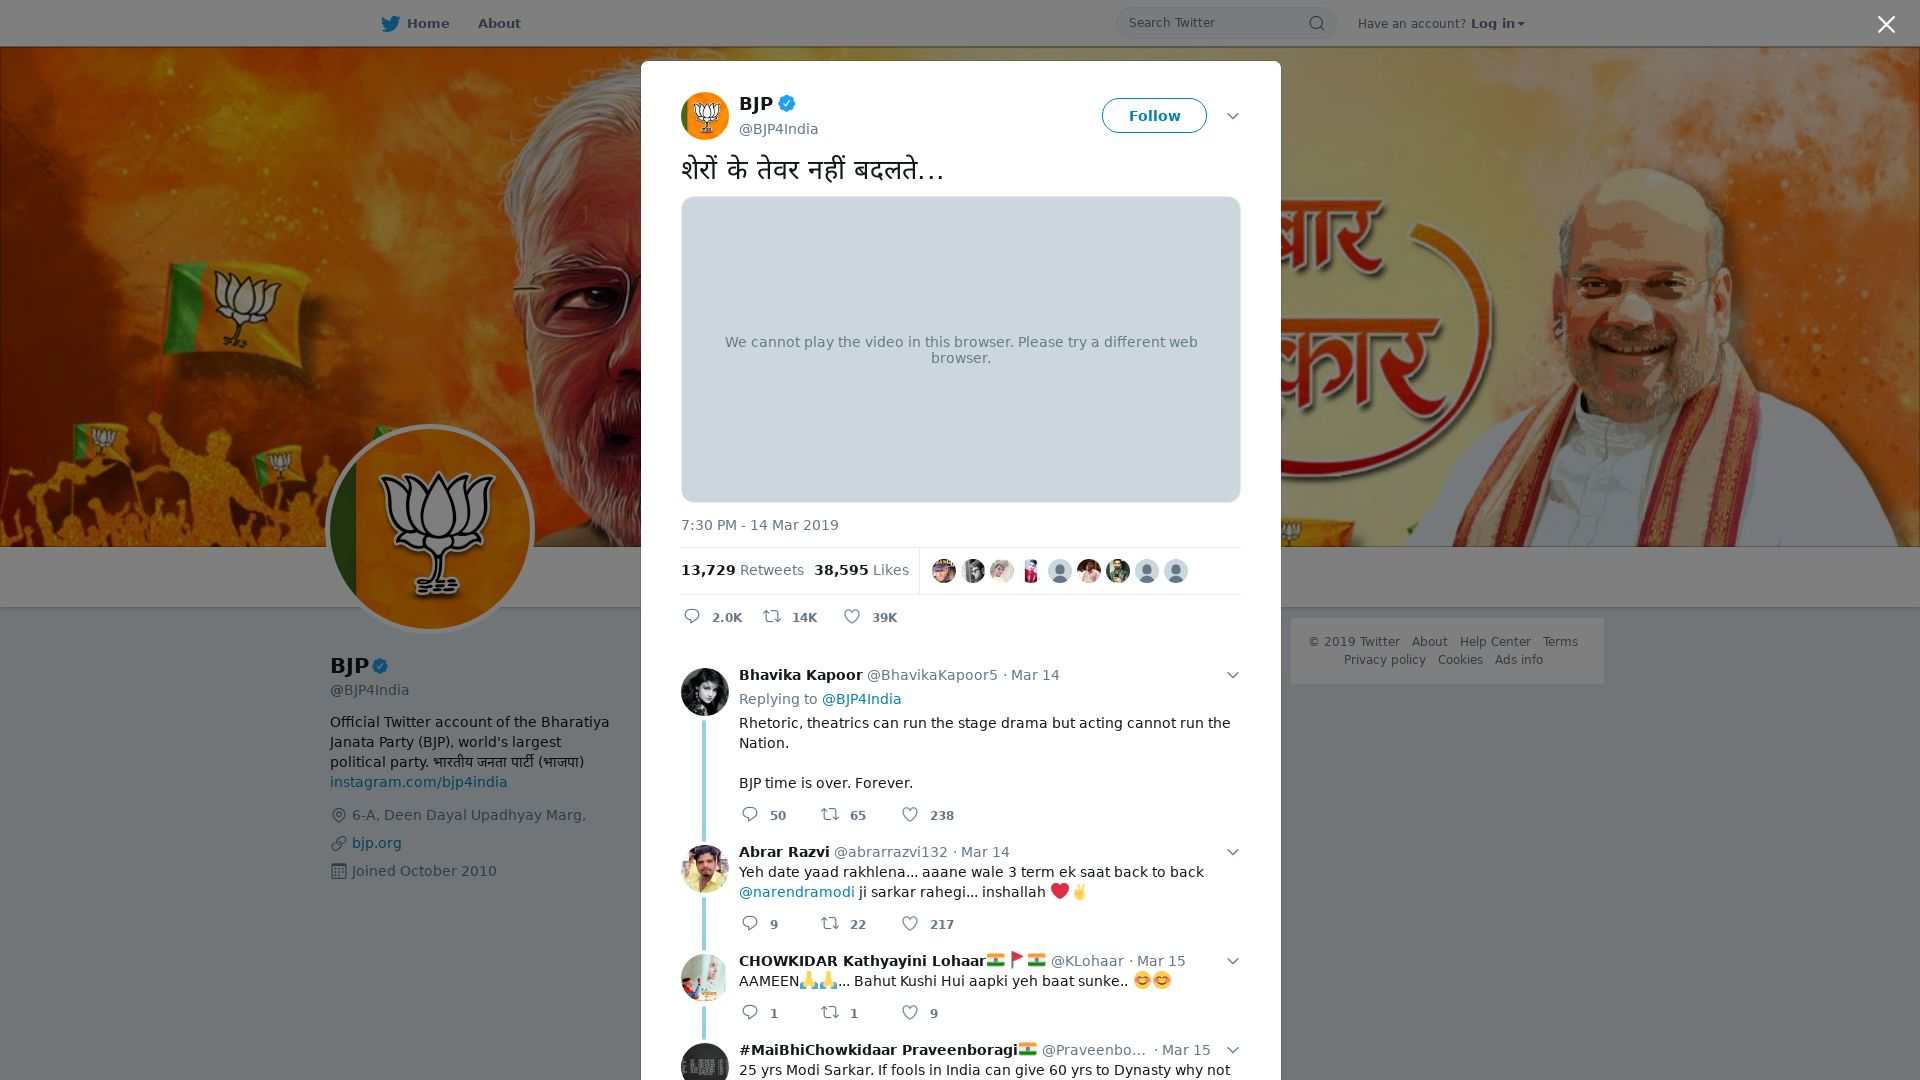

In [24]:
Image(filename='most_popular_tweet3.jpeg') 

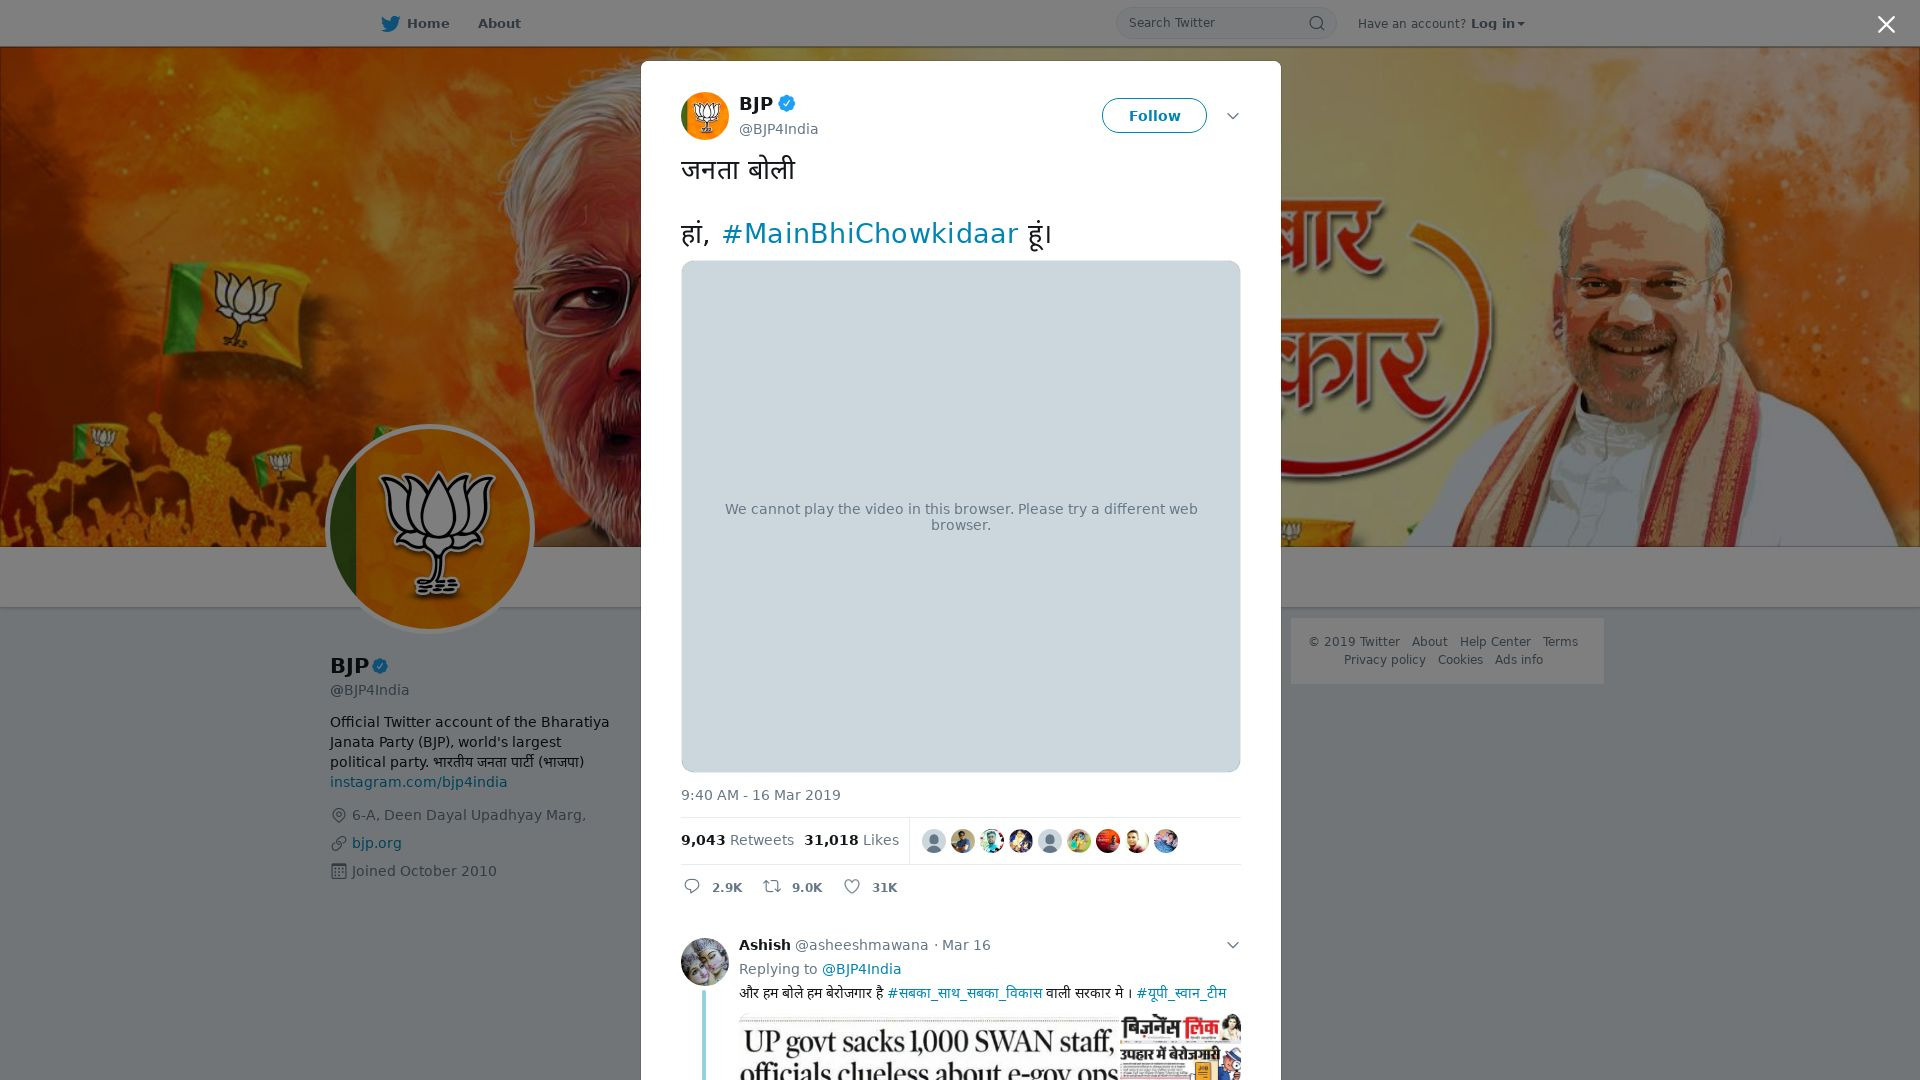

In [25]:
Image(filename='most_popular_tweet4.jpeg') 

# 1.d. Most used hashtag


In [57]:
import operator
hashtags={}
for i in a:
    for j in i.entities['hashtags']:
        tag=j['text']
        if(tag in hashtags):
            hashtags[tag]=hashtags[tag]+1
        else:
            hashtags[tag]=1
print("Mot used hashtag by BJP:")
# print(sorted(hashtags.items(), key=operator.itemgetter(1))[0])
sorted_hashtags=sorted(hashtags.items(), key=lambda kv: kv[1],reverse=True)
for i in range(5):
    print(i+1,sorted_hashtags[i][0])

Mot used hashtag by BJP:
1 BJPSankalpPatr2019
2 IsBaarNaMoPhirSe
3 IsBaarPhirModi
4 IndiaWithNaMo
5 DeshKeLiyeModi


# 2. INC

In [48]:
b=[]
for status in tweepy.Cursor(api.user_timeline, screen_name='@INCIndia', tweet_mode="extended").items():
    b.append(status)

In [63]:
import pickle
with open('congress_tweets.pkl', 'wb') as f:
    pickle.dump(b, f)
total_tweets=len(b)

# 2.a. tweets with images

In [87]:
image_count=0
# print(a[2].entities)
for i in a[:]:
    if('media' in i.entities):
        for j in i.entities['media']:
            if(j['type']=='photo'):
                image_count+=1
print(image_count)

1781


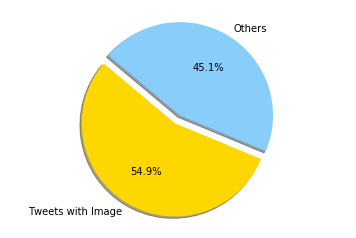

In [92]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
labels = 'Tweets with Image', 'Others'
sizes = [image_count,total_tweets-image_count]
colors = ['gold','lightskyblue']
explode = (0.1, 0,)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# 2.b. word cloud


In [106]:
popular=[]
for i in b[:]:
    text=i.full_text
    popu=i.retweet_count+i.favorite_count
    ID=i.id
    adict={'popularity':popu,'ID':ID,'full_text':text}
    popular.append(adict)
# print(popular)
# print("popular =",popular,"ID =",ID)
sorted_popularity=sorted(popular, key = lambda i: i['popularity'],reverse=True)

In [107]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

comment_words=""
stopwords = set(STOPWORDS) 
for i in range(1000): 
       
    val=sorted_popularity[i]['full_text']
    
    # split the value 
    tokens = val.split() 

    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        comment_words = comment_words+tokens[i].lower()+" "
          

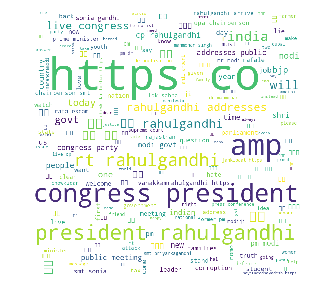

In [108]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# 2.c. top 5 hashtags congress

In [109]:
hashtags={}
for i in b:
    for j in i.entities['hashtags']:
        tag=j['text']
        if(tag in hashtags):
            hashtags[tag]=hashtags[tag]+1
        else:
            hashtags[tag]=1
print("Mot used hashtag by Congress:")
# print(sorted(hashtags.items(), key=operator.itemgetter(1))[0])
sorted_hashtags=sorted(hashtags.items(), key=lambda kv: kv[1],reverse=True)
for i in range(5):
    print(i+1,sorted_hashtags[i][0])

Mot used hashtag by Congress:
1 NammaRahulGandhi
2 RafaleScam
3 ChowkidarChorHai
4 TelanganasProgressWithCongress
5 YoungIndiaRising
